# Import Libraries

In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn import linear_model
import scipy
from scipy.stats import chisquare

# Define file name

In [381]:
step =  15
step_size = 0.02
start = 0.02
pot_name_array = [0 for a in range(step)]
meta_name_array = [0 for a in range(step)]
for i in range(step):
    file_name = str(round(start + step_size * i,2))
    
    if (len(file_name) == 3):
        file_name = str(round(float(file_name),2)) + '0'
    if (len(file_name) >4):
        file_name = file_name[0:4]
    
    meta_name = 'meta/' + file_name + '_meta.dat'
    file_name = 'potential/' + file_name + '_potential.dat'
    
    pot_name_array[i] = file_name
    meta_name_array[i] = meta_name
print(pot_name_array)
print(meta_name_array)

['potential/0.02_potential.dat', 'potential/0.04_potential.dat', 'potential/0.06_potential.dat', 'potential/0.08_potential.dat', 'potential/0.10_potential.dat', 'potential/0.12_potential.dat', 'potential/0.14_potential.dat', 'potential/0.16_potential.dat', 'potential/0.18_potential.dat', 'potential/0.20_potential.dat', 'potential/0.22_potential.dat', 'potential/0.24_potential.dat', 'potential/0.26_potential.dat', 'potential/0.28_potential.dat', 'potential/0.30_potential.dat']
['meta/0.02_meta.dat', 'meta/0.04_meta.dat', 'meta/0.06_meta.dat', 'meta/0.08_meta.dat', 'meta/0.10_meta.dat', 'meta/0.12_meta.dat', 'meta/0.14_meta.dat', 'meta/0.16_meta.dat', 'meta/0.18_meta.dat', 'meta/0.20_meta.dat', 'meta/0.22_meta.dat', 'meta/0.24_meta.dat', 'meta/0.26_meta.dat', 'meta/0.28_meta.dat', 'meta/0.30_meta.dat']


# Defining Fit_function

In [382]:
def fit_function(x, Beta_1, Beta_2):
    #y = V_0 * A * np.log(Beta_1 * (x ** Beta_2)+ Beta_3 )
    #y = Beta_1 + Beta_2*x + Beta_3 * x**2
    #sheet_carrier_density * (10** -20)
    #y =  V_0 * np.exp((-1 * Beta_1* Beta_3 **(sheet_carrier_density * 10** -14) *x / tot_layer + Beta_2) )
    y =  V_0 * np.exp((-1 * Beta_1* np.exp(sheet_carrier_density * 10** -14) *x / tot_layer + Beta_2) )
    print(sheet_carrier_density)
    return y

# Fitting the potential 

In [383]:
## This cell is not used for analysis. Just to show the form of dataframe used 
df = pd.read_csv(pot_name_array[0])
V_0 = float(df.columns[0])
df.loc[-1] = V_0
df.index = df.index + 1
df.sort_index(inplace=True) 
df['layer'] = range(1,df.shape[0]+ 1, 1)
df.rename(columns = {df.columns[0]: 'potential'}, inplace = True)
tot_layer = df.shape[0]
sheet_carrier_density = float(pd.read_csv(meta_name_array[0]).iloc[-1].values[0])
df['sheet_carrier_density'] = sheet_carrier_density
df

,potential,layer,sheet_carrier_density
0,-0.020000,1,4.708074e+12
1,-0.018526,2,4.708074e+12
2,-0.017109,3,4.708074e+12
3,-0.015770,4,4.708074e+12
4,-0.014512,5,4.708074e+12
...,...,...,...
145,0.000000,146,4.708074e+12
146,0.000000,147,4.708074e+12
147,0.000000,148,4.708074e+12
148,0.000000,149,4.708074e+12


4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.02 eV :
coefficients [5.92973439 0.083741  ]
4708074415535.667


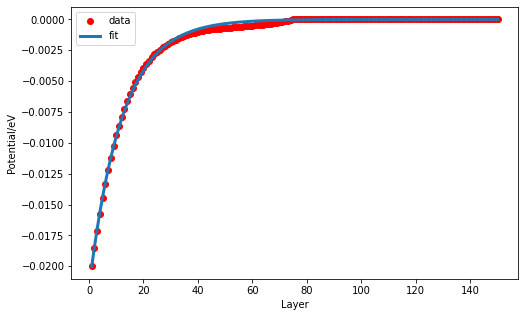

4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
r2_score aveage over 4 validations: 0.22336799073554225
_____________________________________________________________________________
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
-0.04 eV :
coefficients [5.70796304 0.06376625]
15373283702178.9


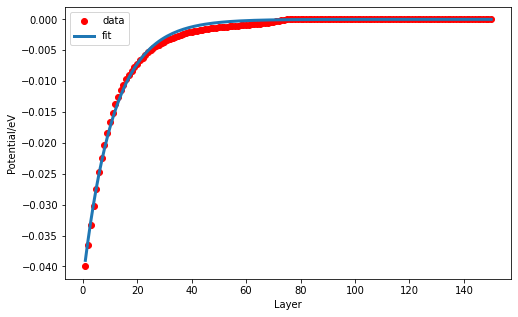

15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
r2_score aveage over 4 validations: 0.1640462301996178
_____________________________________________________________________________
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
-0.06 eV :
coefficients [5.44572852 0.07018291]
28870858753698.42


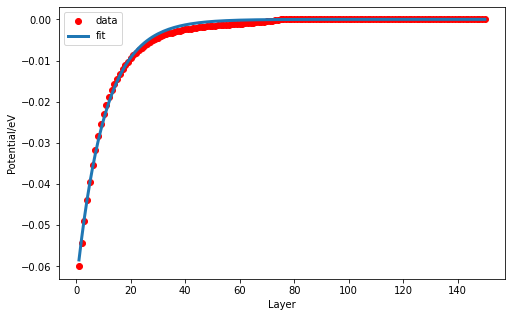

28870858753698.42
28870858753698.42
28870858753698.42
28870858753698.42
r2_score aveage over 4 validations: 0.10833819693079075
_____________________________________________________________________________
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
-0.08 eV :
coefficients [4.98699297 0.07951277]
45248578270590.49


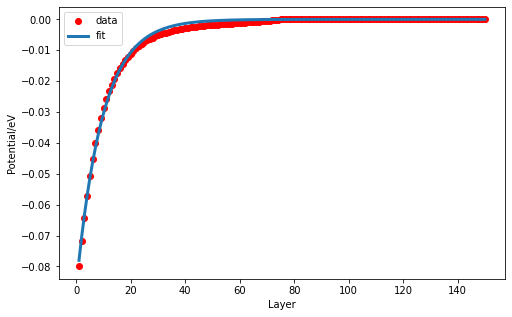

45248578270590.49
45248578270590.49
45248578270590.49
45248578270590.49
r2_score aveage over 4 validations: 0.05177086153232868
_____________________________________________________________________________
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
-0.1 eV :
coefficients [4.21244761 0.08684041]
65771011432244.28


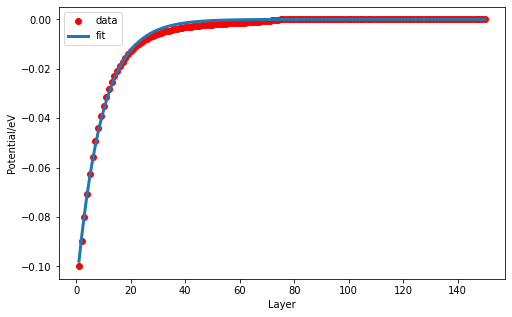

65771011432244.28
65771011432244.28
65771011432244.28
65771011432244.28
r2_score aveage over 4 validations: -0.013730580422562644
_____________________________________________________________________________
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
-0.12 eV :
coefficients [3.40128003 0.09504916]
90179401388713.94


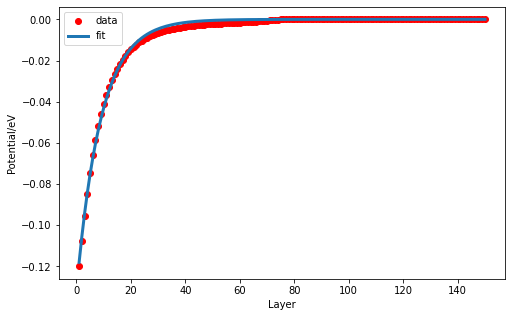

90179401388713.94
90179401388713.94
90179401388713.94
90179401388713.94
r2_score aveage over 4 validations: -0.0356744746344079
_____________________________________________________________________________
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
-0.14 eV :
coefficients [2.5447956  0.10194891]
120184421294691.53


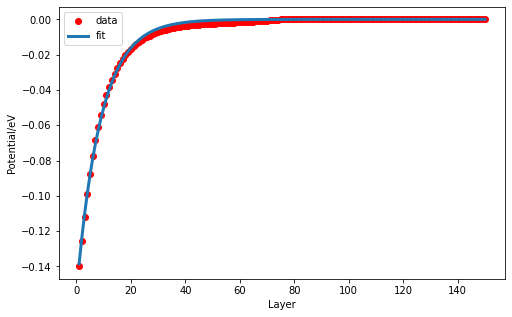

120184421294691.53
120184421294691.53
120184421294691.53
120184421294691.53
r2_score aveage over 4 validations: -0.011200896610819994
_____________________________________________________________________________
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
-0.16 eV :
coefficients [1.87986796 0.1158356 ]
158736948764342.2


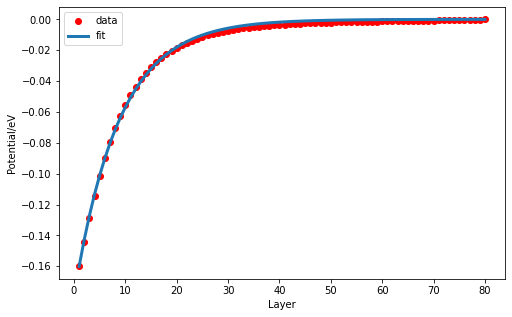

158736948764342.2
158736948764342.2
158736948764342.2
158736948764342.2
r2_score aveage over 4 validations: -1.5232016571849487
_____________________________________________________________________________
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
-0.18 eV :
coefficients [1.23342958 0.12669663]
201332726154467.72


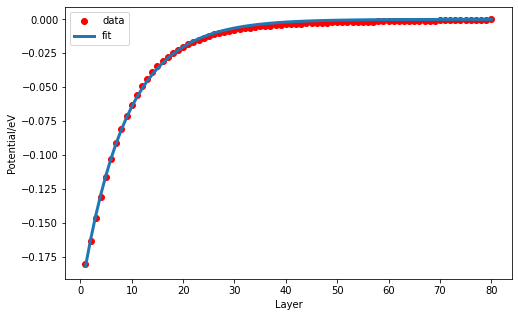

201332726154467.72
201332726154467.72
201332726154467.72
201332726154467.72
r2_score aveage over 4 validations: -1.420914584703606
_____________________________________________________________________________
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
-0.2 eV :
coefficients [0.73627079 0.13425136]
251483435553239.47


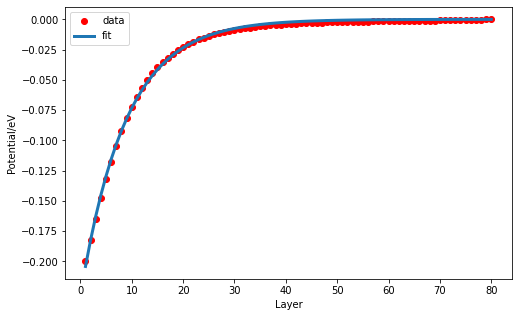

251483435553239.47
251483435553239.47
251483435553239.47
251483435553239.47
r2_score aveage over 4 validations: -1.191177110890279
_____________________________________________________________________________
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
-0.22 eV :
coefficients [0.38111679 0.1428897 ]
315787408592034.5


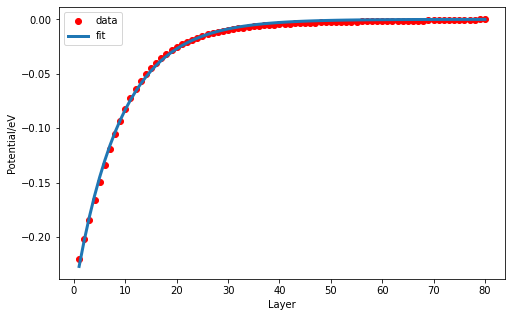

315787408592034.5
315787408592034.5
315787408592034.5
315787408592034.5
r2_score aveage over 4 validations: -0.9479085157771819
_____________________________________________________________________________
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
-0.24 eV :
coefficients [0.16757591 0.15183699]
395870711440869.75


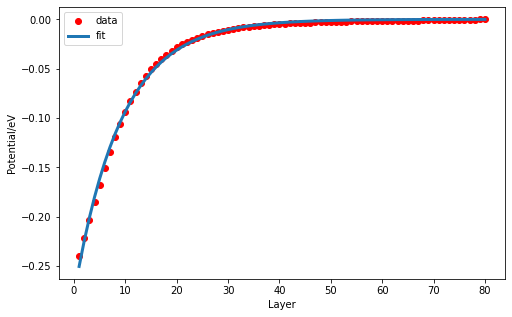

395870711440869.75
395870711440869.75
395870711440869.75
395870711440869.75
r2_score aveage over 4 validations: -0.5298732288022294
_____________________________________________________________________________
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
-0.26 eV :
coefficients [0.08077998 0.15935864]
465805661131249.06


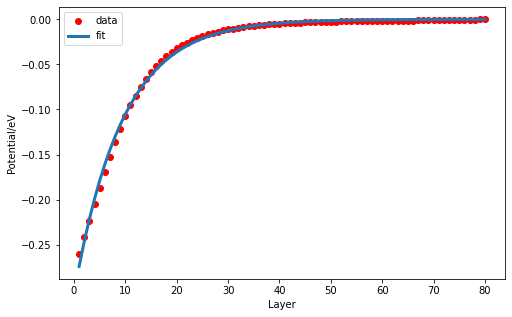

465805661131249.06
465805661131249.06
465805661131249.06
465805661131249.06
r2_score aveage over 4 validations: -0.15880112929926998
_____________________________________________________________________________
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
551755370112431

/tmp/ipykernel_16510/3660987619.py:6: RuntimeWarning: overflow encountered in exp
  y =  V_0 * np.exp((-1 * Beta_1* np.exp(sheet_carrier_density * 10** -14) *x / tot_layer + Beta_2) )


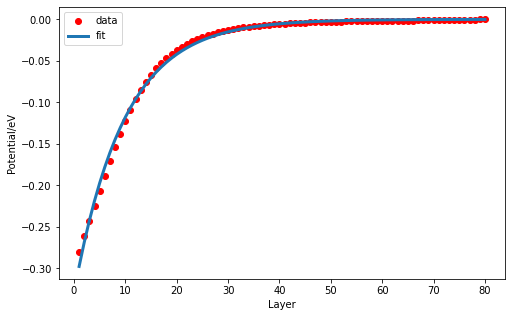

551755370112431.0
551755370112431.0
551755370112431.0
551755370112431.0
r2_score aveage over 4 validations: 0.07245491514160063
_____________________________________________________________________________
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
64

/tmp/ipykernel_16510/3660987619.py:6: RuntimeWarning: overflow encountered in exp
  y =  V_0 * np.exp((-1 * Beta_1* np.exp(sheet_carrier_density * 10** -14) *x / tot_layer + Beta_2) )


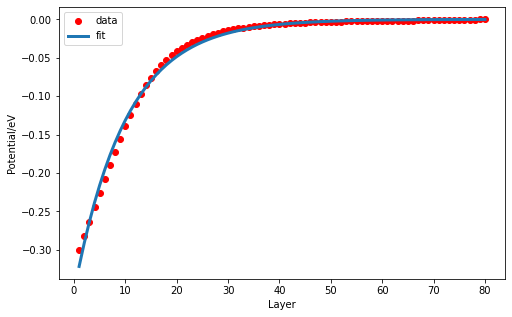

645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
r2_score aveage over 4 validations: 0.31266941177016666
_____________________________________________________________________________


[4708074415535.667,
 15373283702178.9,
 28870858753698.42,
 45248578270590.49,
 65771011432244.28,
 90179401388713.94,
 120184421294691.53,
 158736948764342.2,
 201332726154467.72,
 251483435553239.47,
 315787408592034.5,
 395870711440869.75,
 465805661131249.06,
 551755370112431.0,
 645662080007487.9]

In [384]:
# number of cross-validation 
n = 4

# to save coefficients 
popt_array = [0 for a in range(step)]

# to save r2_score
r2_array = [0 for a in range(step)]

V_0_array = [0 for a in range(step)]

sheet_den_array = [0 for a in range(step)]

for i in range(step):
    
    # Setting up dataframe
    df = pd.read_csv(pot_name_array[i])
    V_0 = float(df.columns[0])
    df.loc[-1] = V_0
    df.index = df.index + 1
    df.sort_index(inplace=True) 
    df['layer'] = range(1,df.shape[0]+ 1, 1)
    df.rename(columns = {df.columns[0]: 'potential'}, inplace = True)
    tot_layer = df.shape[0]
    sheet_carrier_density = float(pd.read_csv(meta_name_array[i]).iloc[-1].values[0])
    df['sheet_carrier_density'] = sheet_carrier_density
    print(sheet_carrier_density)
    sheet_den_array[i] = sheet_carrier_density
    
    if (tot_layer == 150):
        tot_layer = 75
    
    V_0_array[i] = V_0
    
    x_data, y_data = (df["layer"].values, df["potential"].values)
    
    popt, pcov = curve_fit(fit_function, x_data, y_data)
    popt_array[i] = popt
    print(str(V_0), 'eV :')
    print('coefficients', popt)
    
    # Plotting plot
    x = df['layer'] 
    plt.figure(figsize=(8,5))
    y = fit_function(x, *popt)
    plt.plot(x_data, y_data, 'ro', label='data')
    plt.plot(x,y, linewidth=3.0, label='fit')
    plt.legend(loc='best')
    plt.ylabel('Potential/eV')
    plt.xlabel('Layer')
    plt.show()
    
    
    kf = KFold(n_splits=n) # Define the split - into 2 folds 
    kf.get_n_splits(x_data) # returns the number of splitting iterations in the cross-validator

    r2score = 0 

    for train_index, test_index in kf.split(x_data):
        X_train, X_test = x_data[train_index], x_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]

        # predict using test set
        y_hat = fit_function(X_test, *popt)
        # evaluation
        #print("Mean absolute error: %.5f" % np.mean(np.absolute(y_hat - y_test)))
        #print("Residual sum of squares (MSE): %.5f" % np.mean((y_hat - y_test) ** 2))
        #print("R2-score: %.5f" % r2_score(y_test,y_hat) )
        r2score += r2_score(y_test,y_hat)

        """
        x = X_test 
        plt.figure(figsize=(8,5))
        y = fit_function(x, *popt)
        plt.plot(X_test, y_test, 'ro', label='data')
        plt.plot(X_test ,y_hat, linewidth=3.0, label='fit')
        plt.legend(loc='best')
        plt.ylabel('Potential/eV')
        plt.xlabel('Layer')
        plt.show()
        """

    r2score = r2score/n
    r2_array[i] = r2score
    print('r2_score aveage over', n, 'validations:', r2score)
    print('_____________________________________________________________________________')

popt_array = np.asanyarray(popt_array)
    
sheet_den_array

# Analysing the coefficients

1 th coefficient


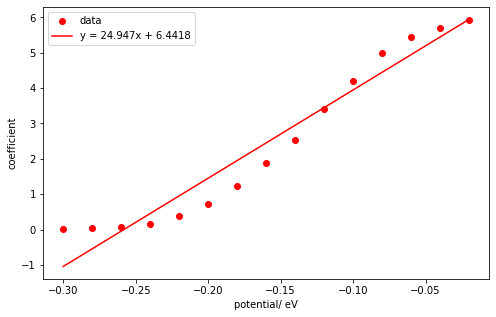

Mean absolute error: 0.44371
Residual sum of squares (MSE): 0.27157
R2-score: 0.94479
Power_divergenceResult(statistic=array([-0.55413714]), pvalue=array([nan]))
Coefficients:  24.947818128105542
Intercept:  6.441887732164062
_________________________________________________________________________
2 th coefficient


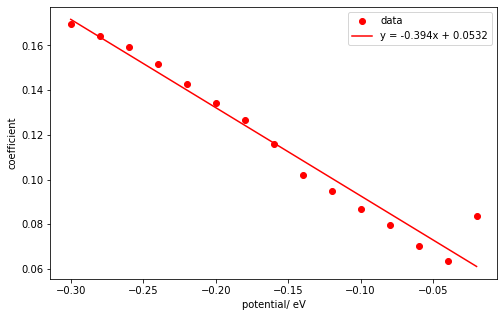

Mean absolute error: 0.00505
Residual sum of squares (MSE): 0.00005
R2-score: 0.95769
Power_divergenceResult(statistic=array([0.01110641]), pvalue=array([nan]))
Coefficients:  -0.3947200339563838
Intercept:  0.053230221967934074
_________________________________________________________________________


In [385]:
for i in range(len(popt_array[0,:])):
    plt.figure(figsize=(8,5))
    
    print(i+1, 'th coefficient')
    x = np.asanyarray(V_0_array).reshape((step,1))
    y = np.asanyarray(popt_array[:,i]).reshape((step,1))
    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    label = 'y = ' + str(regr.coef_[0][0])[0:6] + 'x + ' + str(regr.intercept_[0])[0:6]
    
    plt.plot(x, y, 'ro', label = 'data')
    plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r', label= label)
    plt.ylabel('coefficient')
    plt.xlabel('potential/ eV')
    plt.legend(loc='best')
    plt.show()
    
    y_pred = regr.predict(x)
    
    print("Mean absolute error: %.5f" % np.mean(np.absolute(y- y_pred)))
    print("Residual sum of squares (MSE): %.5f" % np.mean((y - y_pred) ** 2))
    print("R2-score: %.5f" % r2_score(y , y_pred) )
    
    chi_square = chisquare(y, f_exp= y_pred, ddof= tot_layer - len(popt_array[0,:]), axis = 0)
    print(chi_square)
    print ('Coefficients: ', regr.coef_[0][0])
    print ('Intercept: ',regr.intercept_[0])
    print('_________________________________________________________________________')

# Determine the overall r2_score

In [386]:
# number of cross-validation 
n = 4

# to save coefficients 
popt_array = [0 for a in range(step)]

# to save r2_score
r2_array = [0 for a in range(step)]

V_0_array = [0 for a in range(step)]

for i in range(step):
    
    # Setting up dataframe
    df = pd.read_csv(pot_name_array[i])
    V_0 = float(df.columns[0])
    df.loc[-1] = V_0
    df.index = df.index + 1
    df.sort_index(inplace=True) 
    df['layer'] = range(1,df.shape[0]+ 1, 1)
    df.rename(columns = {df.columns[0]: 'potential'}, inplace = True)
    tot_layer = df.shape[0]
    sheet_carrier_density = float(pd.read_csv(meta_name_array[i]).iloc[-1].values[0])
    df['sheet_carrier_density'] = sheet_carrier_density
    
    print(str(V_0), 'eV :')
    V_0_array[i] = V_0
    
    x_data, y_data = (df["layer"].values, df["potential"].values)

    # build the model using train set
    popt, pcov = curve_fit(fit_function, x_data, y_data)

    # predict using test set
    y_hat = fit_function(x_data, *popt)
    # evaluation
    print("Mean absolute error: %.5f" % np.mean(np.absolute(y_hat - y_data)))
    print("Residual sum of squares (MSE): %.9f" % np.mean((y_hat - y_data) ** 2))
    print("R2-score: %.5f" % r2_score(y_data,y_hat) )
    
    r2_array[i] = r2_score(y_data,y_hat)

print('average r2_score', np.mean(r2_array))

-0.02 eV :
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
Mean absolute error: 0.00010
Residual sum of squares (MSE): 0.000000027
R2-score: 0.99812
-0.04 eV :
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
15373283702178.9
1537

645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
645662080007487.9
Mean absolute error: 0.00311
Residual sum of squares (MSE): 0.000024810
R2-score: 0.99543
average r2_score 0.9974322551331375


/tmp/ipykernel_16510/3660987619.py:6: RuntimeWarning: overflow encountered in exp
  y =  V_0 * np.exp((-1 * Beta_1* np.exp(sheet_carrier_density * 10** -14) *x / tot_layer + Beta_2) )
/tmp/ipykernel_16510/3660987619.py:6: RuntimeWarning: overflow encountered in exp
  y =  V_0 * np.exp((-1 * Beta_1* np.exp(sheet_carrier_density * 10** -14) *x / tot_layer + Beta_2) )


# K-Cross validation 

4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.02 eV :
4708074415535.667
Mean absolute error: 0.00013
Residual sum of squares (MSE): 0.00000
R2-score: 0.99931
4708074415535.667


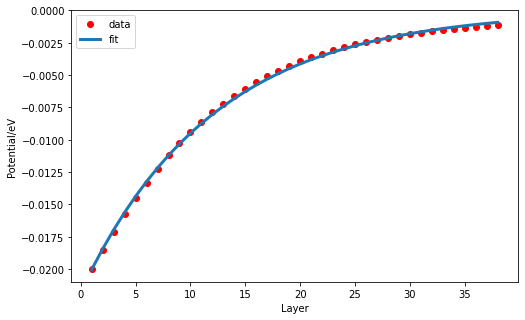

4708074415535.667
Mean absolute error: 0.00028
Residual sum of squares (MSE): 0.00000
R2-score: -0.10584
4708074415535.667


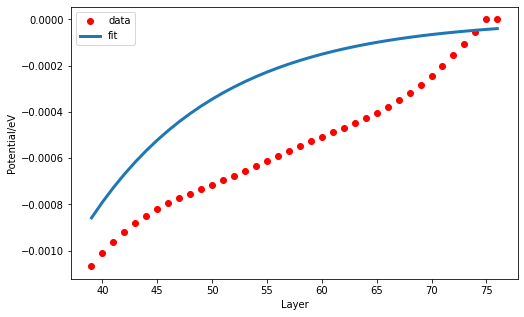

4708074415535.667
Mean absolute error: 0.00001
Residual sum of squares (MSE): 0.00000
R2-score: 0.00000
4708074415535.667


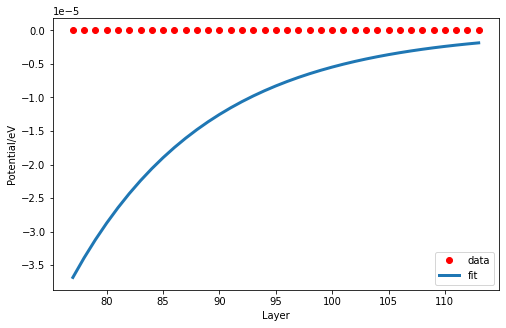

4708074415535.667
Mean absolute error: 0.00000
Residual sum of squares (MSE): 0.00000
R2-score: 0.00000
4708074415535.667


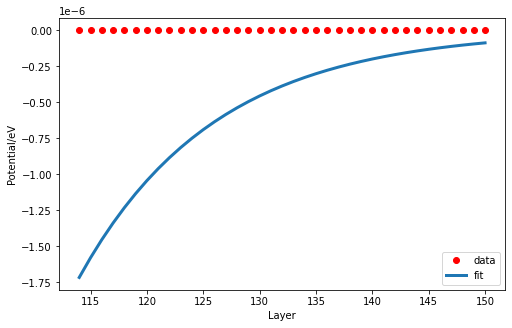

r2_score aveage over 4 validations: 0.22336834878417433
_____________________________________________________________________________
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.04 eV :
4708074415535.667
Mean absolute error: 0.00055
Residual sum of squares (MSE): 0.00000
R2-score: 0.99652
4708074415535.667


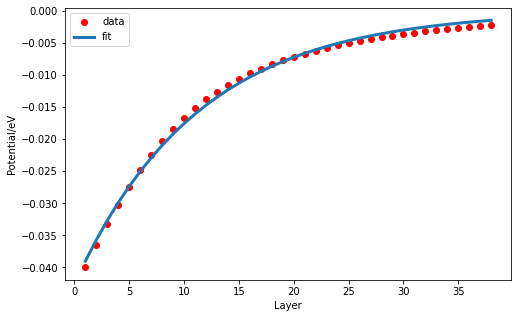

4708074415535.667
Mean absolute error: 0.00060
Residual sum of squares (MSE): 0.00000
R2-score: -0.34034
4708074415535.667


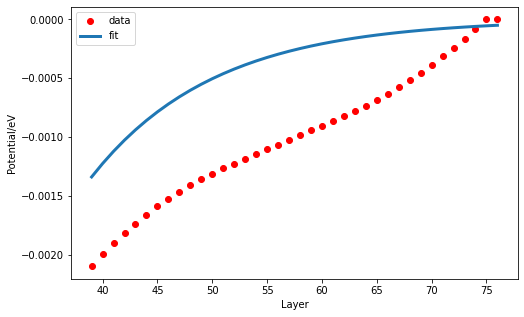

4708074415535.667
Mean absolute error: 0.00001
Residual sum of squares (MSE): 0.00000
R2-score: 0.00000
4708074415535.667


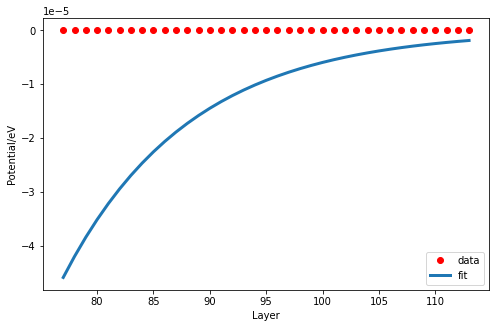

4708074415535.667
Mean absolute error: 0.00000
Residual sum of squares (MSE): 0.00000
R2-score: 0.00000
4708074415535.667


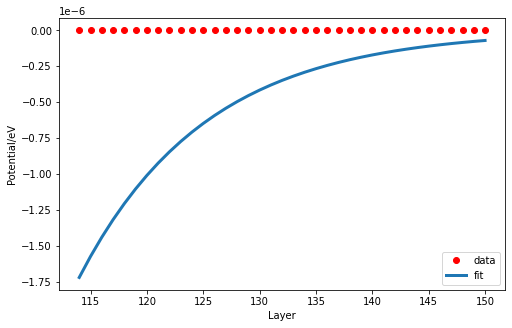

r2_score aveage over 4 validations: 0.16404570201499669
_____________________________________________________________________________
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.06 eV :
4708074415535.667
Mean absolute error: 0.00082
Residual sum of squares (MSE): 0.00000
R2-score: 0.99656
4708074415535.667


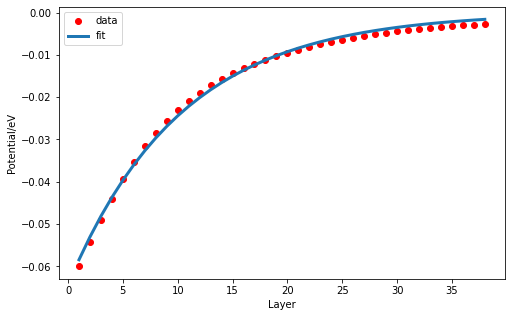

4708074415535.667
Mean absolute error: 0.00080
Residual sum of squares (MSE): 0.00000
R2-score: -0.56320
4708074415535.667


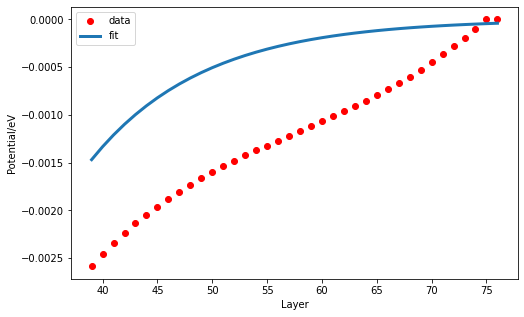

4708074415535.667
Mean absolute error: 0.00001
Residual sum of squares (MSE): 0.00000
R2-score: 0.00000
4708074415535.667


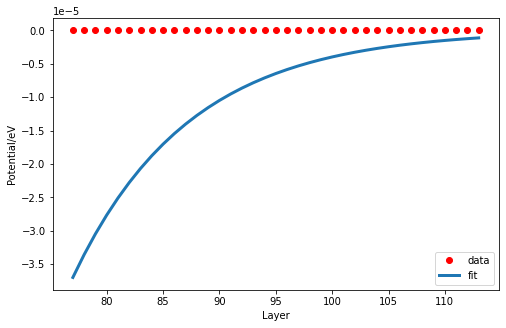

4708074415535.667
Mean absolute error: 0.00000
Residual sum of squares (MSE): 0.00000
R2-score: 0.00000
4708074415535.667


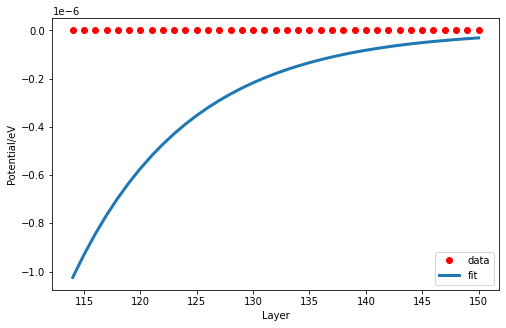

r2_score aveage over 4 validations: 0.1083383203684456
_____________________________________________________________________________
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.08 eV :
4708074415535.667
Mean absolute error: 0.00113
Residual sum of squares (MSE): 0.00000
R2-score: 0.99633
4708074415535.667


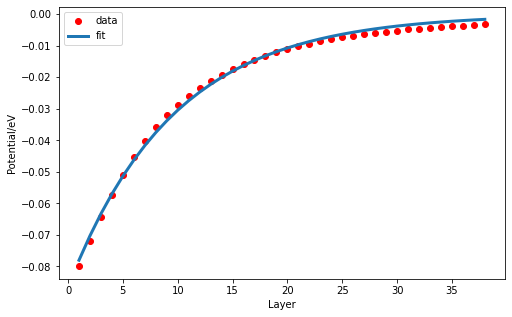

4708074415535.667
Mean absolute error: 0.00100
Residual sum of squares (MSE): 0.00000
R2-score: -0.78924
4708074415535.667


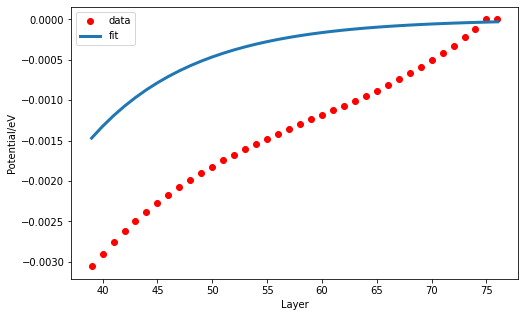

4708074415535.667
Mean absolute error: 0.00001
Residual sum of squares (MSE): 0.00000
R2-score: 0.00000
4708074415535.667


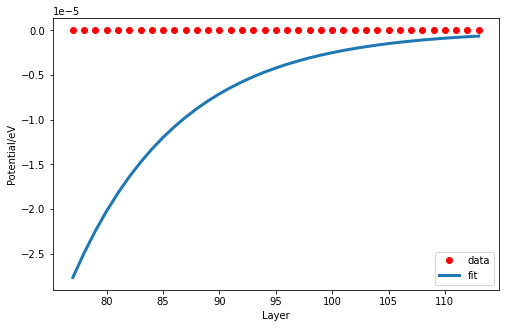

4708074415535.667
Mean absolute error: 0.00000
Residual sum of squares (MSE): 0.00000
R2-score: 0.00000
4708074415535.667


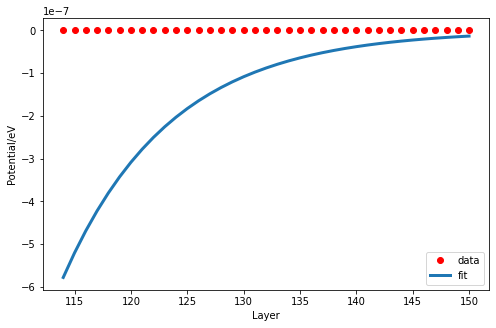

r2_score aveage over 4 validations: 0.05177196534621556
_____________________________________________________________________________
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.1 eV :
4708074415535.667
Mean absolute error: 0.00127
Residual sum of squares (MSE): 0.00000
R2-score: 0.99702
4708074415535.667


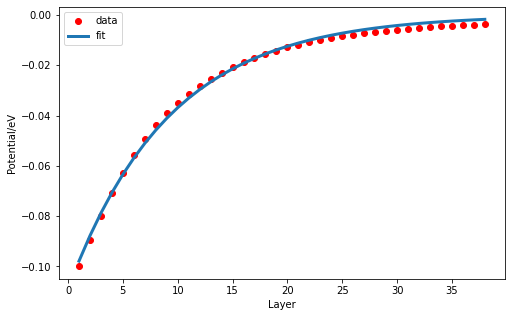

4708074415535.667
Mean absolute error: 0.00120
Residual sum of squares (MSE): 0.00000
R2-score: -1.05193
4708074415535.667


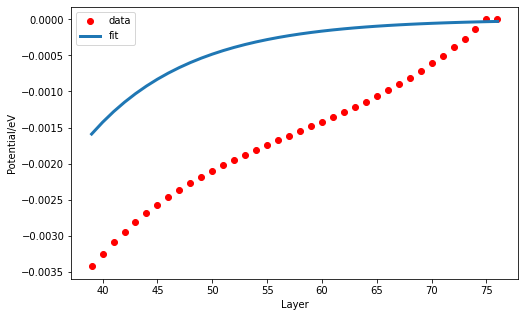

4708074415535.667
Mean absolute error: 0.00001
Residual sum of squares (MSE): 0.00000
R2-score: 0.00000
4708074415535.667


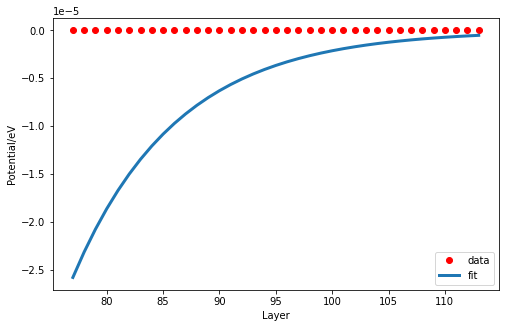

4708074415535.667
Mean absolute error: 0.00000
Residual sum of squares (MSE): 0.00000
R2-score: 0.00000
4708074415535.667


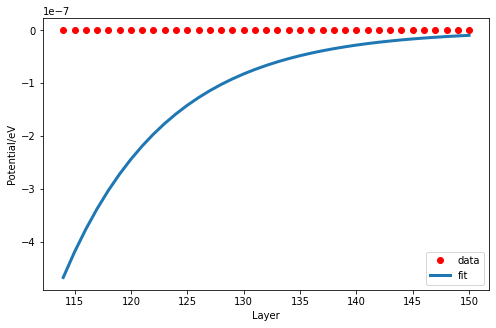

r2_score aveage over 4 validations: -0.01372923285485983
_____________________________________________________________________________
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.12 eV :
4708074415535.667
Mean absolute error: 0.00143
Residual sum of squares (MSE): 0.00000
R2-score: 0.99742
4708074415535.667


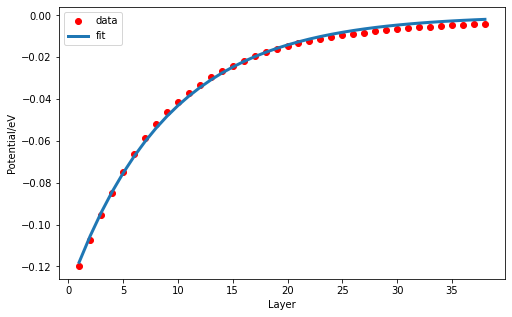

4708074415535.667
Mean absolute error: 0.00134
Residual sum of squares (MSE): 0.00000
R2-score: -1.14012
4708074415535.667


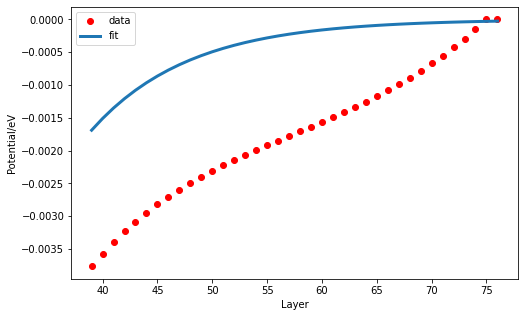

4708074415535.667
Mean absolute error: 0.00001
Residual sum of squares (MSE): 0.00000
R2-score: 0.00000
4708074415535.667


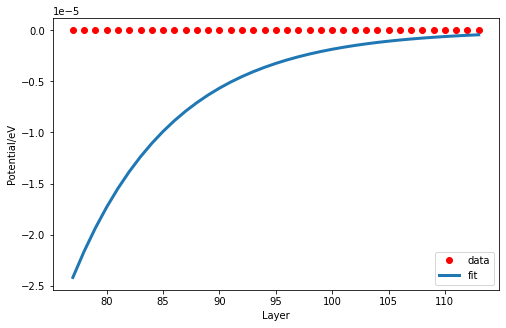

4708074415535.667
Mean absolute error: 0.00000
Residual sum of squares (MSE): 0.00000
R2-score: 0.00000
4708074415535.667


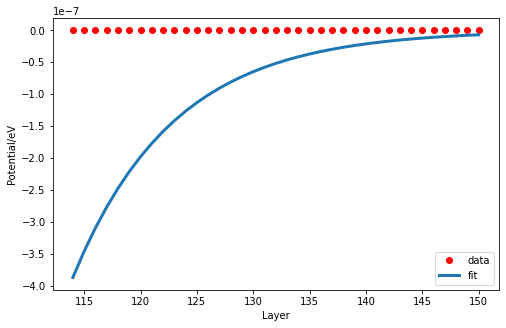

r2_score aveage over 4 validations: -0.035674305700458736
_____________________________________________________________________________
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.14 eV :
4708074415535.667
Mean absolute error: 0.00147
Residual sum of squares (MSE): 0.00000
R2-score: 0.99808
4708074415535.667


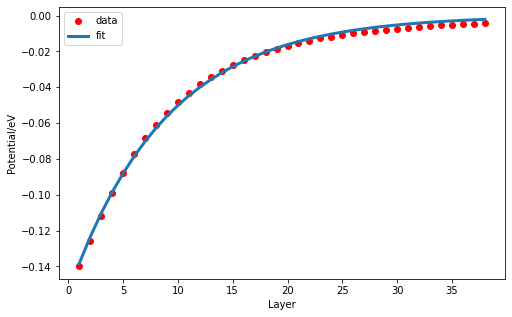

4708074415535.667
Mean absolute error: 0.00140
Residual sum of squares (MSE): 0.00000
R2-score: -1.04288
4708074415535.667


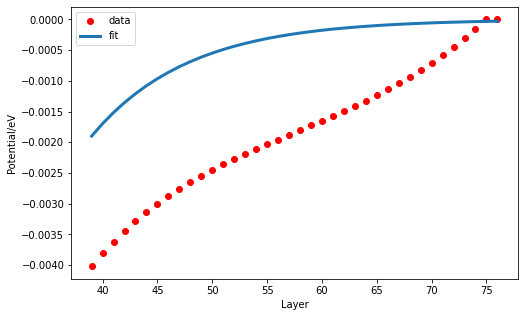

4708074415535.667
Mean absolute error: 0.00001
Residual sum of squares (MSE): 0.00000
R2-score: 0.00000
4708074415535.667


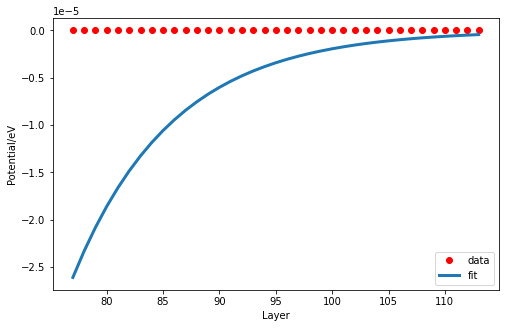

4708074415535.667
Mean absolute error: 0.00000
Residual sum of squares (MSE): 0.00000
R2-score: 0.00000
4708074415535.667


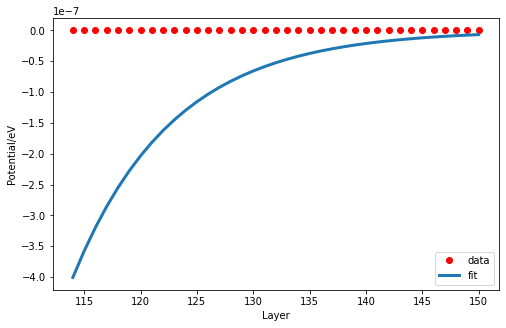

r2_score aveage over 4 validations: -0.01120038777824528
_____________________________________________________________________________
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.16 eV :
4708074415535.667
Mean absolute error: 0.00095
Residual sum of squares (MSE): 0.00000
R2-score: 0.99935
4708074415535.667


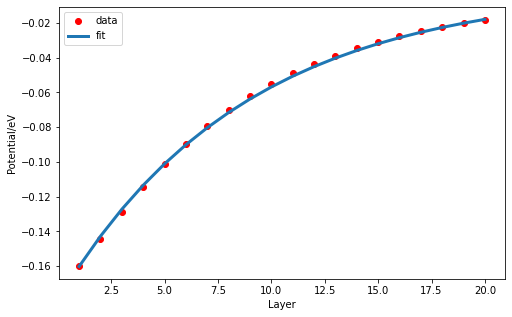

4708074415535.667
Mean absolute error: 0.00148
Residual sum of squares (MSE): 0.00000
R2-score: 0.84646
4708074415535.667


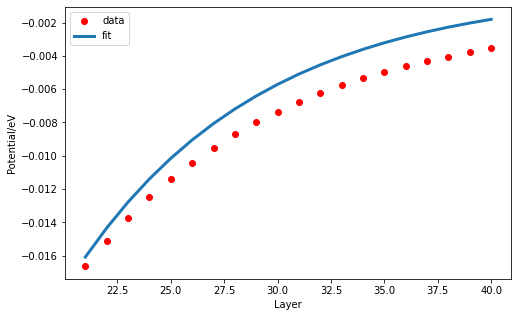

4708074415535.667
Mean absolute error: 0.00147
Residual sum of squares (MSE): 0.00000
R2-score: -5.23082
4708074415535.667


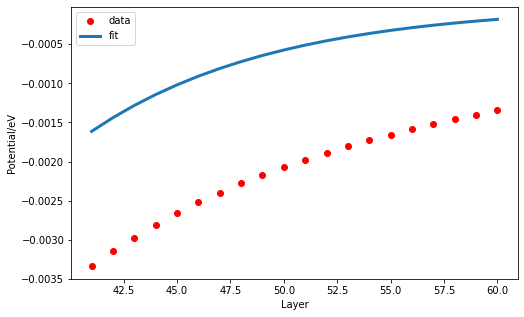

4708074415535.667
Mean absolute error: 0.00065
Residual sum of squares (MSE): 0.00000
R2-score: -2.70780
4708074415535.667


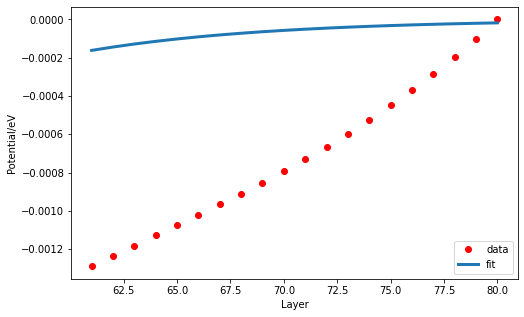

r2_score aveage over 4 validations: -1.5232016609124037
_____________________________________________________________________________
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.18 eV :
4708074415535.667
Mean absolute error: 0.00115
Residual sum of squares (MSE): 0.00000
R2-score: 0.99928
4708074415535.667


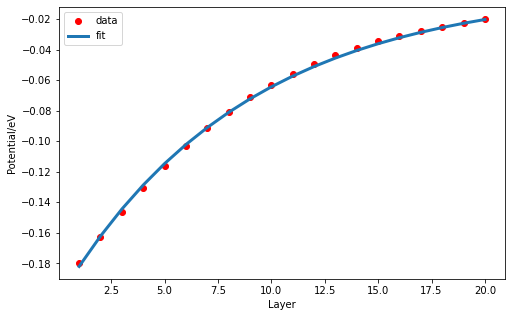

4708074415535.667
Mean absolute error: 0.00124
Residual sum of squares (MSE): 0.00000
R2-score: 0.90451
4708074415535.667


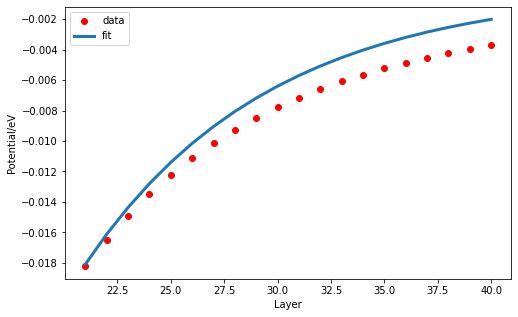

4708074415535.667
Mean absolute error: 0.00149
Residual sum of squares (MSE): 0.00000
R2-score: -4.87127
4708074415535.667


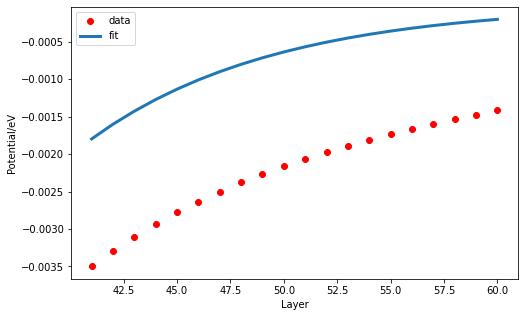

4708074415535.667
Mean absolute error: 0.00069
Residual sum of squares (MSE): 0.00000
R2-score: -2.71618
4708074415535.667


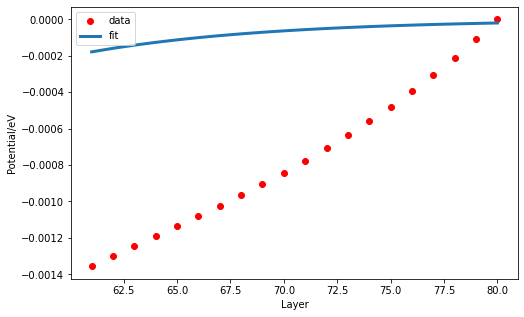

r2_score aveage over 4 validations: -1.420915178616658
_____________________________________________________________________________
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.2 eV :
4708074415535.667
Mean absolute error: 0.00160
Residual sum of squares (MSE): 0.00000
R2-score: 0.99885
4708074415535.667


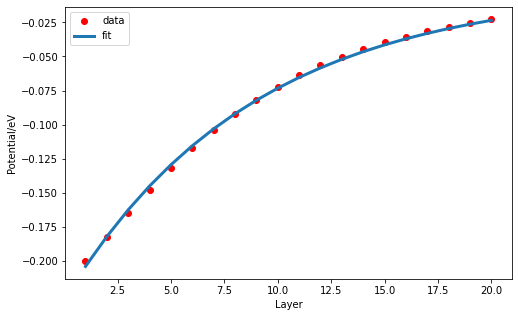

4708074415535.667
Mean absolute error: 0.00101
Residual sum of squares (MSE): 0.00000
R2-score: 0.94304
4708074415535.667


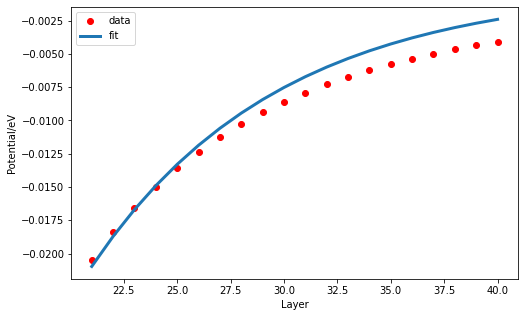

4708074415535.667
Mean absolute error: 0.00153
Residual sum of squares (MSE): 0.00000
R2-score: -4.12566
4708074415535.667


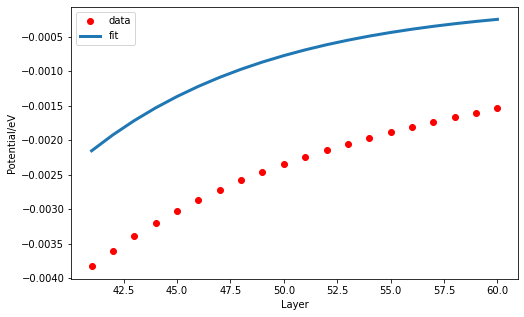

4708074415535.667
Mean absolute error: 0.00073
Residual sum of squares (MSE): 0.00000
R2-score: -2.58093
4708074415535.667


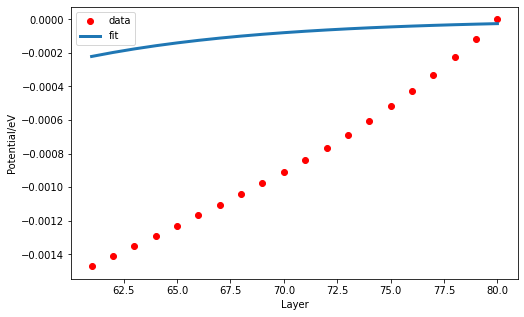

r2_score aveage over 4 validations: -1.1911761941836976
_____________________________________________________________________________
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.22 eV :
4708074415535.667
Mean absolute error: 0.00246
Residual sum of squares (MSE): 0.00001
R2-score: 0.99777
4708074415535.667


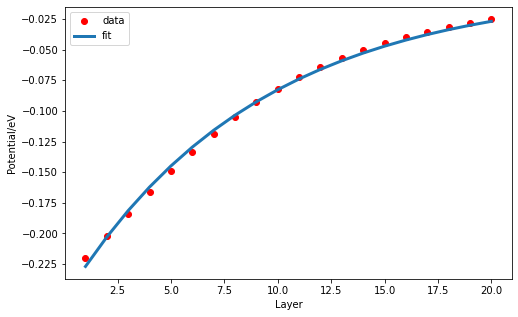

4708074415535.667
Mean absolute error: 0.00100
Residual sum of squares (MSE): 0.00000
R2-score: 0.95764
4708074415535.667


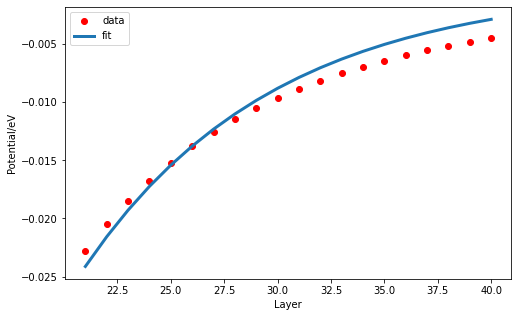

4708074415535.667
Mean absolute error: 0.00156
Residual sum of squares (MSE): 0.00000
R2-score: -3.31437
4708074415535.667


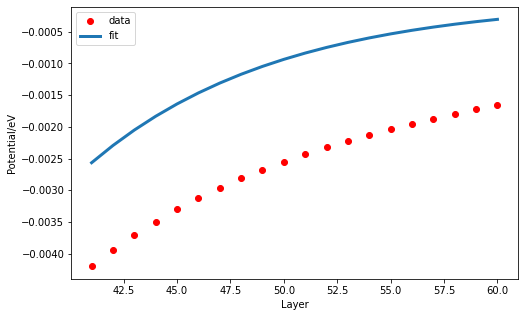

4708074415535.667
Mean absolute error: 0.00077
Residual sum of squares (MSE): 0.00000
R2-score: -2.43269
4708074415535.667


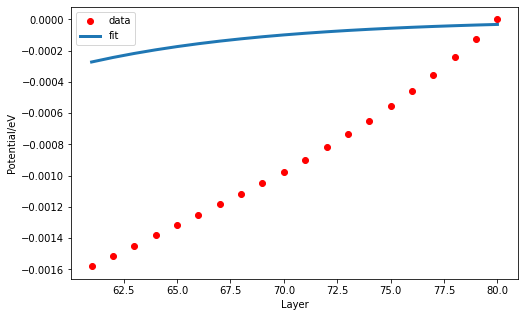

r2_score aveage over 4 validations: -0.947908516767372
_____________________________________________________________________________
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.24 eV :
4708074415535.667
Mean absolute error: 0.00348
Residual sum of squares (MSE): 0.00002
R2-score: 0.99616
4708074415535.667


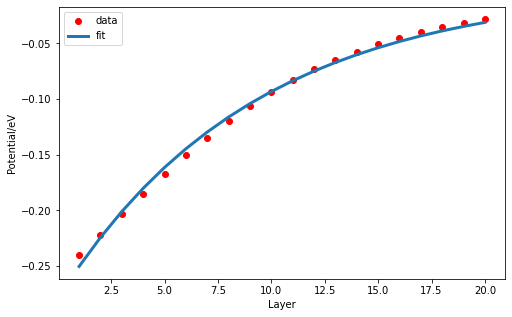

4708074415535.667
Mean absolute error: 0.00094
Residual sum of squares (MSE): 0.00000
R2-score: 0.96608
4708074415535.667


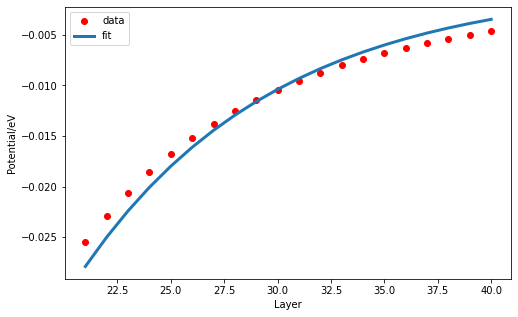

4708074415535.667
Mean absolute error: 0.00136
Residual sum of squares (MSE): 0.00000
R2-score: -1.89150
4708074415535.667


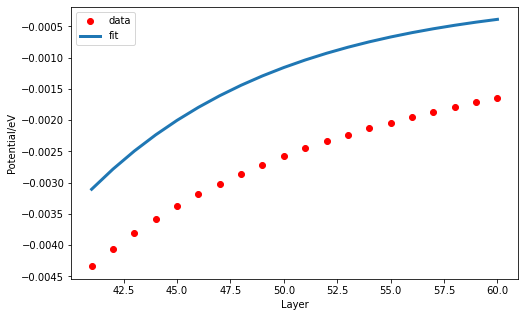

4708074415535.667
Mean absolute error: 0.00074
Residual sum of squares (MSE): 0.00000
R2-score: -2.19024
4708074415535.667


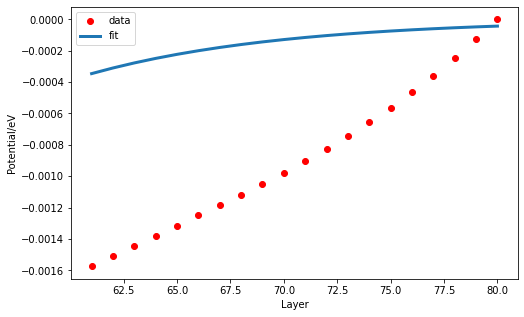

r2_score aveage over 4 validations: -0.5298735429560312
_____________________________________________________________________________
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.26 eV :
4708074415535.667
Mean absolute error: 0.00466
Residual sum of squares (MSE): 0.00003
R2-score: 0.99394
4708074415535.667


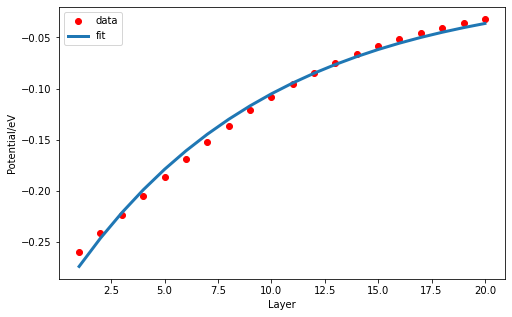

4708074415535.667
Mean absolute error: 0.00149
Residual sum of squares (MSE): 0.00000
R2-score: 0.92715
4708074415535.667


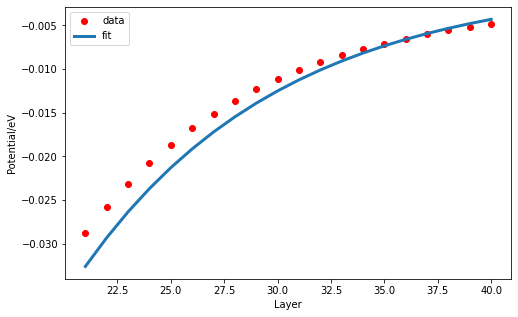

4708074415535.667
Mean absolute error: 0.00105
Residual sum of squares (MSE): 0.00000
R2-score: -0.68687
4708074415535.667


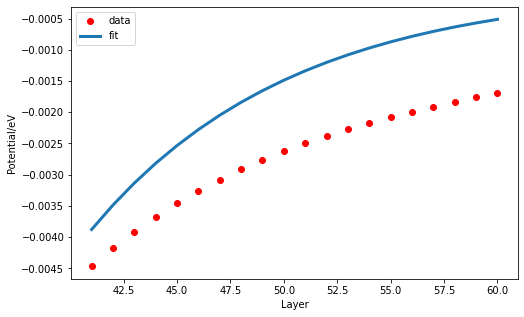

4708074415535.667
Mean absolute error: 0.00073
Residual sum of squares (MSE): 0.00000
R2-score: -1.86943
4708074415535.667


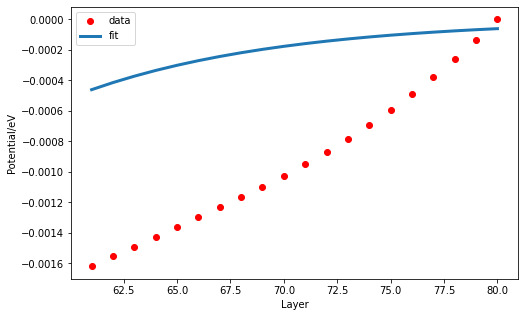

r2_score aveage over 4 validations: -0.15880203035632962
_____________________________________________________________________________
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.28 eV :
4708074415535.667
Mean absolute error: 0.00597
Residual sum of squares (MSE): 0.00005
R2-score: 0.99131
4708074415535.667


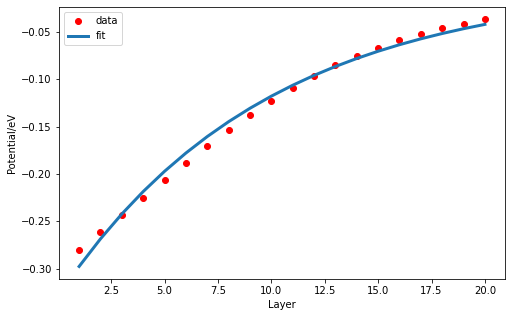

4708074415535.667
Mean absolute error: 0.00233
Residual sum of squares (MSE): 0.00001
R2-score: 0.87196
4708074415535.667


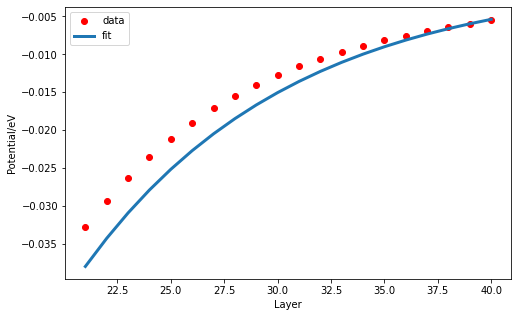

4708074415535.667
Mean absolute error: 0.00096
Residual sum of squares (MSE): 0.00000
R2-score: -0.09143
4708074415535.667


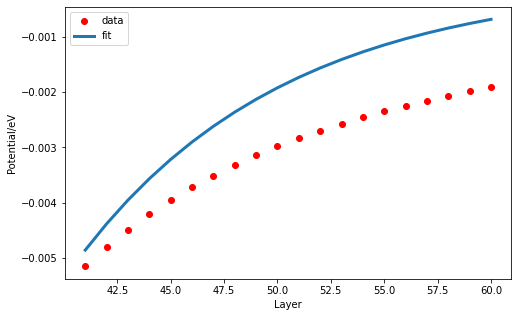

4708074415535.667
Mean absolute error: 0.00076
Residual sum of squares (MSE): 0.00000
R2-score: -1.48201
4708074415535.667


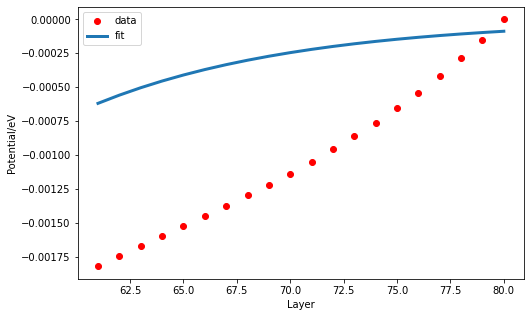

r2_score aveage over 4 validations: 0.07245833047993777
_____________________________________________________________________________
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
4708074415535.667
-0.3 eV :
4708074415535.667
Mean absolute error: 0.00747
Residual sum of squares (MSE): 0.00008
R2-score: 0.98797
4708074415535.667


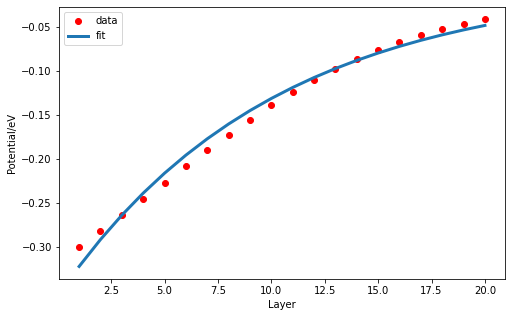

4708074415535.667
Mean absolute error: 0.00357
Residual sum of squares (MSE): 0.00002
R2-score: 0.79371
4708074415535.667


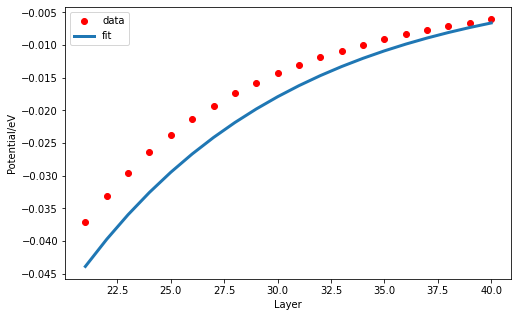

4708074415535.667
Mean absolute error: 0.00070
Residual sum of squares (MSE): 0.00000
R2-score: 0.46482
4708074415535.667


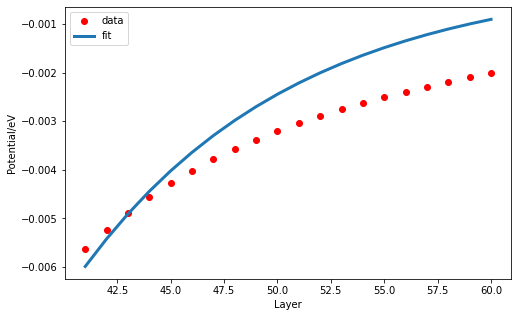

4708074415535.667
Mean absolute error: 0.00072
Residual sum of squares (MSE): 0.00000
R2-score: -0.99583
4708074415535.667


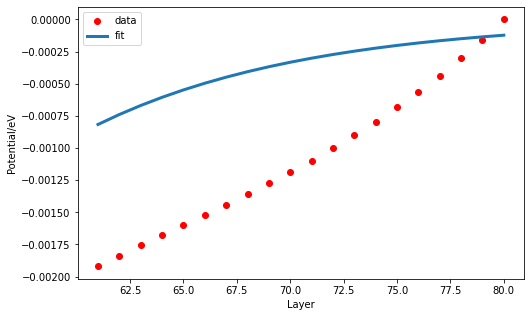

r2_score aveage over 4 validations: 0.31266734939844343
_____________________________________________________________________________
average r2_score -0.32665540224892287


In [387]:
# number of cross-validation 
n = 4

# to save coefficients 
popt_array = [0 for a in range(step)]

# to save r2_score
r2_array = [0 for a in range(step)]

V_0_array = [0 for a in range(step)]

for i in range(step):
    
    
    # Setting up dataframe
    df = pd.read_csv(pot_name_array[i])
    V_0 = float(df.columns[0])
    df.loc[-1] = V_0
    df.index = df.index + 1
    df.sort_index(inplace=True) 
    df['layer'] = range(1,df.shape[0]+ 1, 1)
    df.rename(columns = {df.columns[0]: 'potential'}, inplace = True)
    tot_layer = df.shape[0]
    sheet_carrier_density = float(pd.read_csv(meta_name_array[0]).iloc[-1].values[0])
    df['sheet_carrier_density'] = sheet_carrier_density
    V_0_array[i] = V_0
    
    x_data, y_data = (df["layer"].values, df["potential"].values)
    
    popt, pcov = curve_fit(fit_function, x_data, y_data)
    popt_array[i] = popt
    print(str(V_0), 'eV :')
    #print('coefficients', popt)
    
    # Plotting plot
    '''
    x = df['layer'] 
    plt.figure(figsize=(8,5))
    y = fit_function(x, *popt)
    plt.plot(x_data, y_data, 'ro', label='data')
    plt.plot(x,y, linewidth=3.0, label='fit')
    plt.legend(loc='best')
    plt.ylabel('Potential/eV')
    plt.xlabel('Layer')
    plt.show()
    '''
    
    kf = KFold(n_splits=n) # Define the split - into 2 folds 
    kf.get_n_splits(x_data) # returns the number of splitting iterations in the cross-validator

    r2score = 0 

    for train_index, test_index in kf.split(x_data):
        X_train, X_test = x_data[train_index], x_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]

        # predict using test set
        y_hat = fit_function(X_test, *popt)
        # evaluation
        print("Mean absolute error: %.5f" % np.mean(np.absolute(y_hat - y_test)))
        print("Residual sum of squares (MSE): %.5f" % np.mean((y_hat - y_test) ** 2))
        print("R2-score: %.5f" % r2_score(y_test,y_hat) )
        r2score += r2_score(y_test,y_hat)

        
        x = X_test 
        plt.figure(figsize=(8,5))
        y = fit_function(x, *popt)
        plt.plot(X_test, y_test, 'ro', label='data')
        plt.plot(X_test ,y_hat, linewidth=3.0, label='fit')
        plt.legend(loc='best')
        plt.ylabel('Potential/eV')
        plt.xlabel('Layer')
        plt.show()
        

    r2score = r2score/n
    r2_array[i] = r2score
    print('r2_score aveage over', n, 'validations:', r2score)
    print('_____________________________________________________________________________')

popt_array = np.asanyarray(popt_array)

print('average r2_score', np.mean(r2_array))

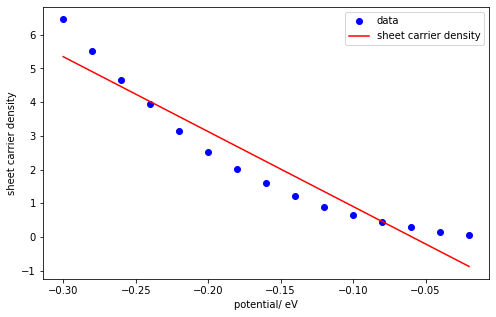

In [388]:
    plt.figure(figsize=(8,5))
    
    
    for i in range(len(sheet_den_array)):
        sheet_den_array[i] = sheet_den_array[i] * 10 **-14 
    x = np.asanyarray(V_0_array).reshape((step,1))
    y = np.asanyarray(sheet_den_array).reshape((step,1))
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    
    plt.plot(x, y, 'bo', label = 'data')
    plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r', label= 'sheet carrier density')
    plt.ylabel('sheet carrier density')
    plt.xlabel('potential/ eV')
    plt.legend(loc='best')
    plt.show()
